# Feature Selection - Decision Tree Classifier
- This notebook will explore different architectures and hyperparameters of the **DecisionTreeClassifier** looking for an optimal configuration. In this case, the Dataset with **feature-selection dimensionality reduction** will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Núñez Sánchez, Fernando

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed = 42
Random.seed!(seed)

TaskLocalRNG()

In [2]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

[ Info: Precompiling Sk_Modeling [top-level]
[ Info: Skipping precompilation since __precompile__(false). Importing Sk_Modeling [top-level].


## Loading data
- The dataset used in this notebook has been reduced using Feature Selection, using the correlation of the different features with the class as the selection criterion.

The selected features are:
1. RAM
2. Battery Power
3. Screen Height
4. Screen Width  

In [3]:
file = h5open("fs_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :KNN
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = []

Any[]

In [5]:
# Define an array of hyperparameter dictionaries for the kNN model
hyperparameters = [
    Dict(:n_neighbors => 5),
    Dict(:n_neighbors => 10),
    Dict(:n_neighbors => 15 ),
    Dict(:n_neighbors => 20 ),
    Dict(:n_neighbors => 50 ),
    Dict(:n_neighbors => 100 )
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 3 -> 0.9 ± 0.024
Hyperparams set 5 -> 0.896 ± 0.02
Hyperparams set 4 -> 0.895 ± 0.03
Hyperparams set 1 -> 0.887 ± 0.022
Hyperparams set 2 -> 0.887 ± 0.025
Hyperparams set 6 -> 0.876 ± 0.025

----- sensitivity means -----
Hyperparams set 3 -> 0.9 ± 0.024
Hyperparams set 5 -> 0.896 ± 0.02
Hyperparams set 4 -> 0.895 ± 0.03
Hyperparams set 1 -> 0.887 ± 0.022
Hyperparams set 2 -> 0.887 ± 0.025
Hyperparams set 6 -> 0.876 ± 0.025

----- specificity means -----
Hyperparams set 3 -> 0.966 ± 0.009
Hyperparams set 5 -> 0.965 ± 0.007
Hyperparams set 4 -> 0.964 ± 0.011
Hyperparams set 2 -> 0.961 ± 0.009
Hyperparams set 1 -> 0.961 ± 0.007
Hyperparams set 6 -> 0.958 ± 0.01

----- ppv means -----
Hyperparams set 3 -> 0.906 ± 0.02
Hyp

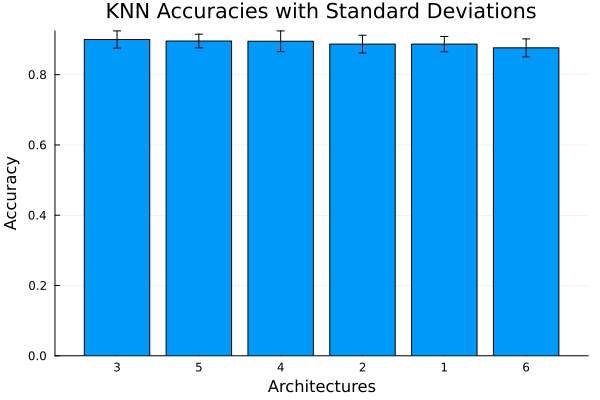

In [6]:
plot_acc_comparison(model, all_metrics)

## Discussion
In this first approach, is noticeable all the configuration return a great performance in terms of accuracy. Although, the best result (0.9 ± 0.024) has been obtain with 15 neighbors. 

Now, we will continue modifying other parameters in search of the best set of hyperparameters


In [7]:
hyperparameters = [
    Dict(:n_neighbors => 15, :weights => "uniform"  ),
    Dict(:n_neighbors => 20, :weights => "uniform"  ),
    Dict(:n_neighbors => 50, :weights => "uniform"  ),
    Dict(:n_neighbors => 15, :weights => "distance"  ),
    Dict(:n_neighbors => 20, :weights => "distance" ),
    Dict(:n_neighbors => 50, :weights => "distance" )
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 4 -> 0.912 ± 0.022
Hyperparams set 5 -> 0.906 ± 0.019
Hyperparams set 6 -> 0.904 ± 0.023
Hyperparams set 1 -> 0.9 ± 0.024
Hyperparams set 3 -> 0.896 ± 0.02
Hyperparams set 2 -> 0.895 ± 0.03

----- sensitivity means -----
Hyperparams set 4 -> 0.912 ± 0.022
Hyperparams set 5 -> 0.906 ± 0.019
Hyperparams set 6 -> 0.904 ± 0.023
Hyperparams set 1 -> 0.9 ± 0.024
Hyperparams set 3 -> 0.896 ± 0.02
Hyperparams set 2 -> 0.895 ± 0.03

----- specificity means -----
Hyperparams set 4 -> 0.971 ± 0.008
Hyperparams set 5 -> 0.968 ± 0.007
Hyperparams set 6 -> 0.968 ± 0.007
Hyperparams set 1 -> 0.966 ± 0.009
Hyperparams set 3 -> 0.965 ± 0.007
Hyperparams set 2 -> 0.964 ± 0.011

----- ppv means -----
Hyperparams set 4 -> 0.917 ± 0.02
Hy

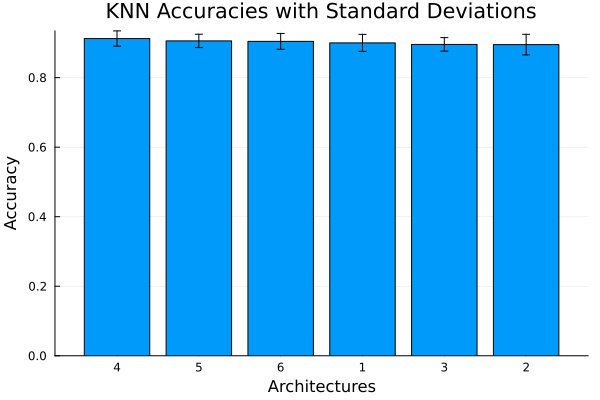

In [8]:
plot_acc_comparison(model, all_metrics)

## Discussion
Analysing the new results, it is clear that weighting votes according to distance improves the model, even if the difference is not very large.

Next, we will try to modify the metric to study if we can obtain a better model.

In [9]:
using Statistics
cov_matrix = cov(train_input, dims=1)
inv_cov_matrix = inv(cov_matrix)
hyperparameters = [
    Dict(:n_neighbors => 15, :weights => "uniform" ,:metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix) ),
    Dict(:n_neighbors => 20, :weights => "uniform" ,:metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix) ),
    Dict(:n_neighbors => 50, :weights => "uniform" ,:metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix) ),
    Dict(:n_neighbors => 15, :weights => "distance" ,:metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix) ),
    Dict(:n_neighbors => 20, :weights => "distance" ,:metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix) ),
    Dict(:n_neighbors => 50, :weights => "distance" ,:metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix) )
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 4 -> 0.901 ± 0.023
Hyperparams set 5 -> 0.897 ± 0.027
Hyperparams set 1 -> 0.894 ± 0.025
Hyperparams set 6 -> 0.894 ± 0.027
Hyperparams set 2 -> 0.893 ± 0.023
Hyperparams set 3 -> 0.889 ± 0.028

----- sensitivity means -----
Hyperparams set 4 -> 0.901 ± 0.023
Hyperparams set 5 -> 0.897 ± 0.027
Hyperparams set 1 -> 0.894 ± 0.025
Hyperparams set 6 -> 0.894 ± 0.027
Hyperparams set 2 -> 0.893 ± 0.023
Hyperparams set 3 -> 0.889 ± 0.028

----- specificity means -----
Hyperparams set 4 -> 0.966 ± 0.008
Hyperparams set 5 -> 0.965 ± 0.008
Hyperparams set 2 -> 0.964 ± 0.008
Hyperparams set 6 -> 0.964 ± 0.009
Hyperparams set 1 -> 0.964 ± 0.009
Hyperparams set 3 -> 0.962 ± 0.011

----- ppv means -----
Hyperparams set 4 -> 0.904 ±

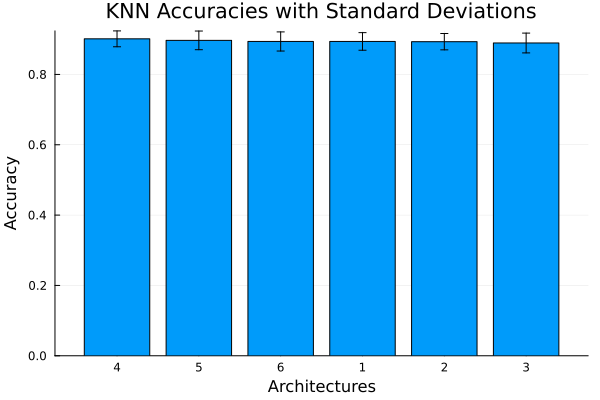

In [10]:
plot_acc_comparison(model, all_metrics)

### Discussion

After this experiment, it has been concluded that using the *Mahalanobis Distance* make worse the accuracy rate of the predictions of the model. It is something that we suspected for this technique of features selection.

- **Mahalanobis Distance**: This distance weighs features using the inverse of the covariance matrix, which can assist in selecting better neighbors as it takes into account the correlation between variables.

Finally, we will try to find the optimal value of neighbors that returns the best accuracy rate.

In [11]:
hyperparameters = [
    Dict(:n_neighbors => 13, :weights => "distance"  ),
    Dict(:n_neighbors => 14, :weights => "distance"  ),
    Dict(:n_neighbors => 15, :weights => "distance"  ),
    Dict(:n_neighbors => 16, :weights => "distance" ),
    Dict(:n_neighbors => 17, :weights => "distance" ),
    Dict(:n_neighbors => 18, :weights => "distance" )
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 3 -> 0.912 ± 0.022
Hyperparams set 1 -> 0.909 ± 0.021
Hyperparams set 6 -> 0.907 ± 0.021
Hyperparams set 2 -> 0.906 ± 0.022
Hyperparams set 5 -> 0.905 ± 0.02
Hyperparams set 4 -> 0.905 ± 0.024

----- sensitivity means -----
Hyperparams set 3 -> 0.912 ± 0.022
Hyperparams set 1 -> 0.909 ± 0.021
Hyperparams set 6 -> 0.907 ± 0.021
Hyperparams set 2 -> 0.906 ± 0.022
Hyperparams set 5 -> 0.905 ± 0.02
Hyperparams set 4 -> 0.905 ± 0.024

----- specificity means -----
Hyperparams set 3 -> 0.971 ± 0.008
Hyperparams set 1 -> 0.97 ± 0.007
Hyperparams set 6 -> 0.969 ± 0.007
Hyperparams set 2 -> 0.969 ± 0.008
Hyperparams set 4 -> 0.968 ± 0.008
Hyperparams set 5 -> 0.968 ± 0.007

----- ppv means -----
Hyperparams set 3 -> 0.917 ± 0.

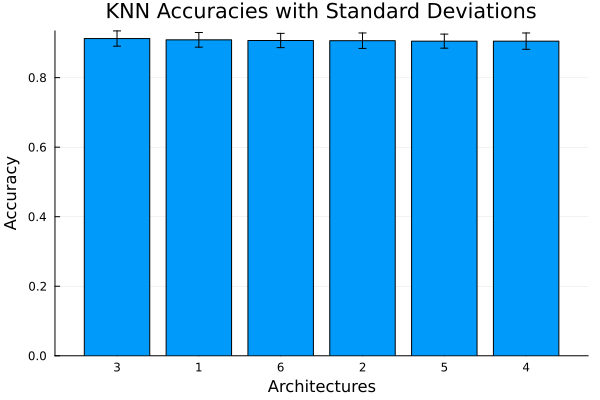

In [12]:
plot_acc_comparison(model, all_metrics)

## Final discussion

To sum up, as it can be seen in the final chart, the best model that we have obtained has been with this set of hyperparameters:

1. **n_neighbors** = 15
2. **Metric**: "Minkowski"
3. **Weights**: "Distance

With them, the better performance in terms of **accuracy** has been **0.912 ± 0.022**.

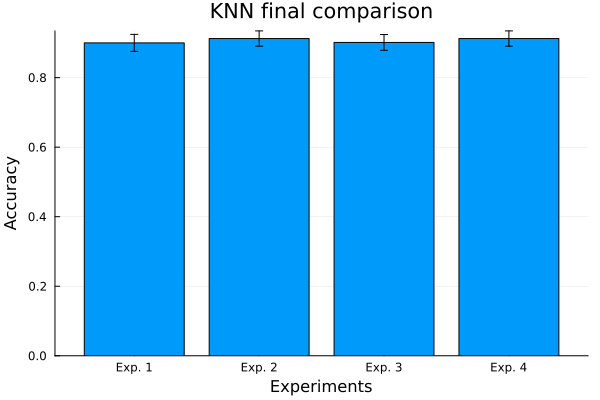

In [13]:
plot_final_comparison("KNN final comparison", best_models_acc)